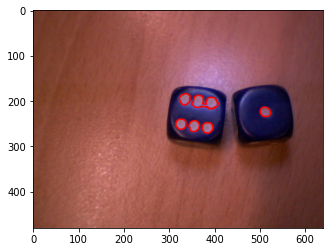

In [93]:
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
from glob import glob
%matplotlib inline 


# camera = cv2.VideoCapture(0)
# _, _ = camera.read()

img = cv2.imread("fotki/0doswietloneggora.jpg")



_,_,blue = cv2.split(img)
ret, thresh = cv2.threshold(blue, 100, 255, cv2.THRESH_BINARY)

contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[-2]  # [-2] indexing takes return value before last (due to OpenCV compatibility issues).




# Find contours in thresh (find the triangles).
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[-2]  # [-2] indexing takes return value before last (due to OpenCV compatibility issues).

# Iterate triangle contours
for c in contours:
    if 300<cv2.contourArea(c)<=1500 :  #  Ignore very small contours
        # Mark triangle with blue line
        cv2.drawContours(img, [c], -1, (0, 0, 255), 2)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


In [94]:
def getThresh(img,lower=100,upper=255):
    img = cv2.imread(img)
    _,_,blue = cv2.split(img)
    ret, thresh = cv2.threshold(blue, lower, upper, cv2.THRESH_BINARY)
    plt.imshow(thresh)
    
interactive(getThresh,img=glob("fotki/*.jpg"),lower=(0,255,1),upper=(0,255,1))


interactive(children=(Dropdown(description='img', options=('fotki/5doswietloneggora.jpg', 'fotki/9doswietloneg…

In [95]:
def getAllParams(img,lowerTh=100,upperTh=255,lowerSize=300,upperSize=1500):
    img = cv2.imread(img)
    _,_,blue = cv2.split(img)
    ret, thresh = cv2.threshold(blue, lowerTh, upperTh, cv2.THRESH_BINARY)
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[-2]  # [-2] indexing takes return value before last (due to OpenCV compatibility issues).
    for c in contours:
        if 300<cv2.contourArea(c)<=1500 :  #  Ignore very small contours
            # Mark triangle with blue line
            cv2.drawContours(img, [c], -1, (0, 0, 255), 2)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

    
interactive(getAllParams,img=glob("fotki/*.jpg"),lowerTh=(0,255,1),
            upperTh=(0,255,1),lowerSize=(300,2000,50),upperSize=(700,2000,50))


interactive(children=(Dropdown(description='img', options=('fotki/5doswietloneggora.jpg', 'fotki/9doswietloneg…